<a href="https://colab.research.google.com/github/VolkhinD/Houses/blob/main/houses_begining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Basic Work with Data***
\
In this work only basic preprocessing job done. I devide all work with data into 2 parts:
* Only Good featrures I choose
* All features \
 The notebook where I investigate Feature Selection Methods

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer, make_column_selector as selector

Download Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dt = {'MSSubClass': 'int32',
 'MSZoning': 'O',
 'LotFrontage': 'float64',
 'LotArea': 'int32',
 'Street':'O',
 'Alley': 'O',
 'LotShape': 'O',
 'LandContour': 'O',
 'Utilities': 'O',
 'LotConfig': 'O',
 'LandSlope': 'O',
 'Neighborhood': 'O',
 'Condition1': 'O',
 'Condition2': 'O',
 'BldgType': 'O',
 'HouseStyle': 'O',
 'OverallQual': 'int32',
 'OverallCond': 'int32',
 'YearBuilt': 'int32',
 'YearRemodAdd': 'int32',
 'RoofStyle': 'O',
 'RoofMatl': 'O',
 'Exterior1st': 'O',
 'Exterior2nd': 'O',
 'MasVnrType': 'O',
 'MasVnrArea': 'float64',
 'ExterQual': 'O',
 'ExterCond': 'O',
 'Foundation': 'O',
 'BsmtQual': 'O',
 'BsmtCond': 'O',
 'BsmtExposure': 'O',
 'BsmtFinType1': 'O',
 'BsmtFinSF1': 'int32',
 'BsmtFinType2':'O',
 'BsmtFinSF2':'int32',
 'BsmtUnfSF': 'int32',
 'TotalBsmtSF': 'int32',
 'Heating': 'O',
 'HeatingQC': 'O',
 'CentralAir': 'O',
 'Electrical': 'O',
 '1stFlrSF': 'int32',
 '2ndFlrSF': 'int32',
 'LowQualFinSF':'int32',
 'GrLivArea': 'int32',
 'BsmtFullBath': 'int32',
 'BsmtHalfBath': 'int32',
 'FullBath': 'int32',
 'HalfBath': 'int32',
 'BedroomAbvGr': 'int32',
 'KitchenAbvGr': 'int32',
 'KitchenQual': 'O',
 'TotRmsAbvGrd': 'int32',
 'Functional': 'O',
 'Fireplaces': 'int64',
 'FireplaceQu': 'O',
 'GarageType': 'O',
 'GarageYrBlt':'int64',
 'GarageFinish': 'O',
 'GarageCars': 'int32',
 'GarageArea': 'int32',
 'GarageQual': 'O',
 'GarageCond': 'O',
 'PavedDrive': 'O',
 'WoodDeckSF': 'int64',
 'OpenPorchSF': 'int64',
 'EnclosedPorch': 'int64',
 '3SsnPorch': 'int64',
 'ScreenPorch': 'int64',
 'PoolArea': 'int64',
 'PoolQC': 'O',
 'Fence': 'O',
 'MiscFeature':'O',
 'MiscVal': 'int64',
 'MoSold':'int64',
 'YrSold':'int64',
 'SaleType': 'O',
 'SaleCondition':'O',
 'SalePrice': 'int64'}

In [4]:
path = '/content/drive/MyDrive/Data/houses/train.csv'
path1 = '/content/drive/MyDrive/Data/houses/test.csv'
df = pd.read_csv(path)
test_data = pd.read_csv(path1)
print(df.shape, test_data.shape)

(1460, 81) (1459, 80)


# Work with Data

# Feature Selection

Set 'Id' as an index \
Add a new feature: total number of Bathrooms in a house

In [5]:
df = df.set_index('Id')
test_data = test_data.set_index('Id')
df['BathNum'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
test_data['BathNum'] = test_data['FullBath'] + 0.5*test_data['HalfBath'] + test_data['BsmtFullBath'] + 0.5*test_data['BsmtHalfBath']
df = df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)
test_data = test_data.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)
df.shape

(1460, 77)

### **Based on my opinion**
I chose only that features that I think good for estimators. I

In [6]:
strong_feat = ['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'KitchenQual', 'BathNum']
good_feat = ['Condition1', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'ExterQual', 'Heating', 'HeatingQC', '2ndFlrSF', 'CentralAir', 'BedroomAbvGr', 'MasVnrArea', 'BsmtQual', 'GarageQual',
             'Fireplaces', 'SaleType', 'GarageCars'] + strong_feat + ['SalePrice']
test_feat = list(set(good_feat) - set(['SalePrice']))
data = df[good_feat] # I reserch intently only good features
test_data = test_data[test_feat]
print(f" I chose {len(good_feat)} features to work with in this dataset")


 I chose 27 features to work with in this dataset


# Missing Values

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageQual,81,5.547945
BsmtQual,37,2.534247
MasVnrArea,8,0.547945
Condition1,0,0.000000
BathNum,0,0.000000


In [8]:
data[['GarageQual', 'BsmtQual']] = data[['GarageQual', 'BsmtQual']].fillna('none')

<ipython-input-8-ac11e9fdaad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['GarageQual', 'BsmtQual']] = data[['GarageQual', 'BsmtQual']].fillna('none')


In [9]:
data.MasVnrArea = data.MasVnrArea.fillna(0.0)

<ipython-input-9-95d83984b047>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.MasVnrArea = data.MasVnrArea.fillna(0.0)


In [10]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageQual,78,5.346127
BsmtQual,44,3.015764
MasVnrArea,15,1.028101
BathNum,2,0.137080
GarageCars,1,0.068540
SaleType,1,0.068540
KitchenQual,1,0.068540
TotalBsmtSF,1,0.068540
GarageArea,1,0.068540
HeatingQC,0,0.000000


In [11]:
test_data[['GarageQual', 'BsmtQual']] = test_data[['GarageQual', 'BsmtQual']].fillna('none')

In [12]:
test_data.MasVnrArea = test_data.MasVnrArea.fillna(0.0)

In [13]:
print("Mean bath number flour round", data.BathNum.mean())
print("Mean number of cars in garage", data.GarageCars.mean())
print("Total basement")

Mean bath number flour round 2.210616438356164
Mean number of cars in garage 1.7671232876712328
Total basement


In [14]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [15]:
test_data.BathNum = test_data.BathNum.fillna(2.0)
test_data.GarageCars = test_data.GarageCars.fillna(2.0)
test_data.TotalBsmtSF = test_data.TotalBsmtSF.fillna(0.0)
test_data.KitchenQual = test_data.KitchenQual.fillna('TA')
test_data.SaleType = test_data.SaleType.fillna('WD')
test_data.GarageArea = test_data.GarageArea.fillna(0.0)

In [16]:
# imputer = SimpleImputer(strategy='most_frequent')
# data = pd.DataFrame(imputer.fit_transform(data), columns=good_feat)
# test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_feat)

# Needed to Change to Ordinal Data

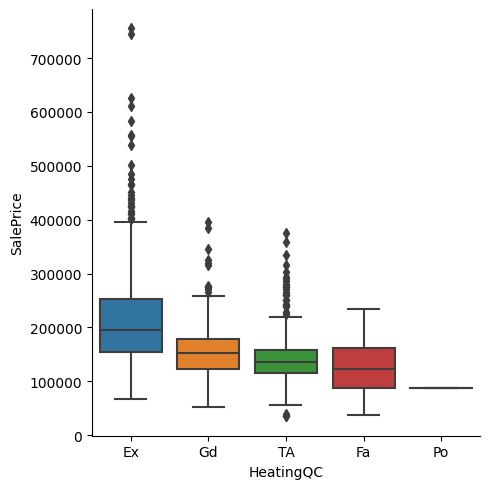

In [17]:
sns.catplot(x='HeatingQC', y="SalePrice", data=df, kind='box')

In [18]:
mapper_feat = ['KitchenQual', 'ExterQual', 'BsmtQual', 'ExterQual']
mapper_2_feat = ['HeatingQC', 'GarageQual']
mapper_3_feat = ['PoolQC']
mapper = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, 'none': 0}
mapper_2 = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4, 'none': 0}

for feat in mapper_feat:
  data[feat] = data[feat].replace(mapper)
  test_data[feat] = test_data[feat].replace(mapper)
for feat in mapper_2_feat:
  data[feat] = data[feat].replace(mapper_2)
  test_data[feat] = test_data[feat].replace(mapper_2)


<ipython-input-18-d17042db281e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feat] = data[feat].replace(mapper)
<ipython-input-18-d17042db281e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feat] = data[feat].replace(mapper_2)


# Relationship with all strong feautures

## Take a look to some graphs

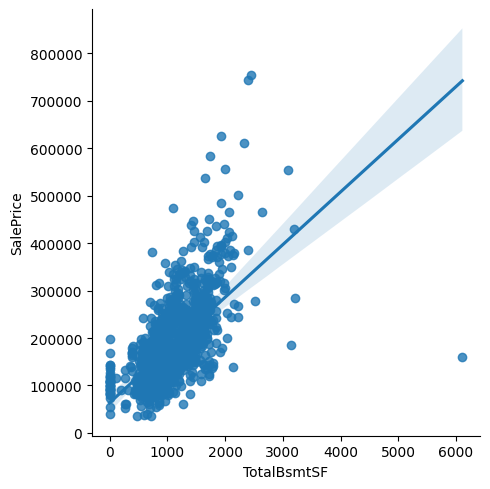

In [19]:
sns.lmplot(x='TotalBsmtSF', y="SalePrice", data=data)

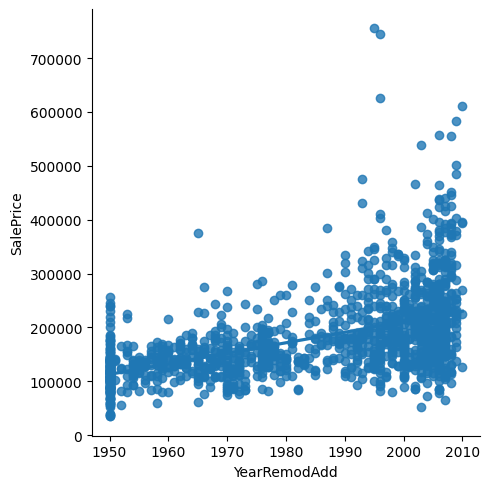

In [20]:
sns.lmplot(x= 'YearRemodAdd', y="SalePrice", data=data)

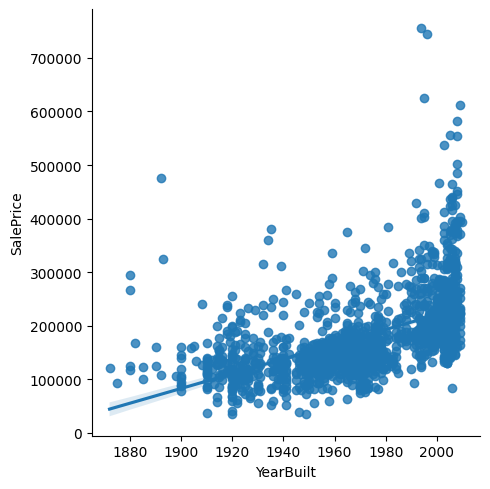

In [21]:
sns.lmplot(x='YearBuilt', y="SalePrice", data=data)

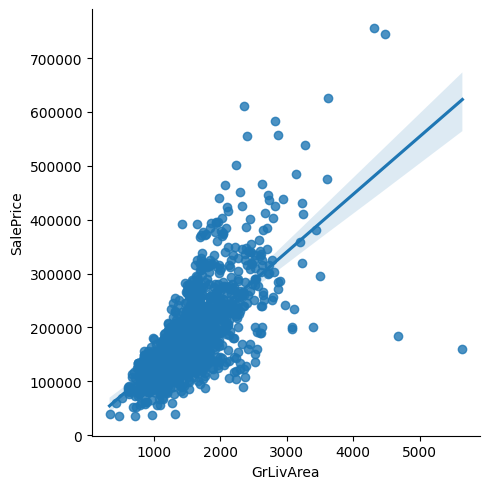

In [22]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=data)

For Example weak feature with many outliers

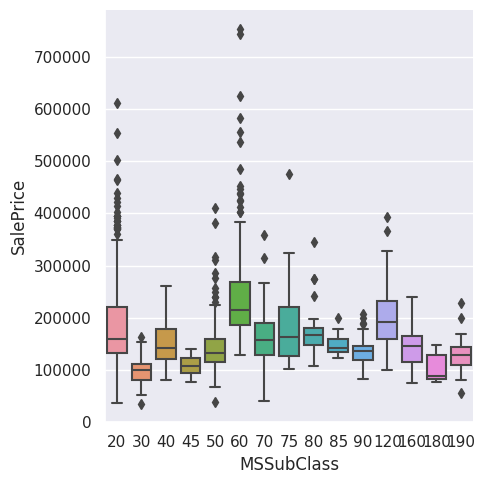

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x='MSSubClass', y="SalePrice", data=df, kind='box')

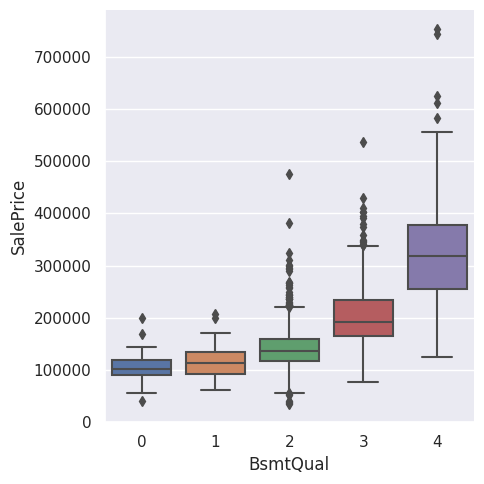

In [24]:
sns.catplot(x='BsmtQual', y="SalePrice", data=data, kind='box')

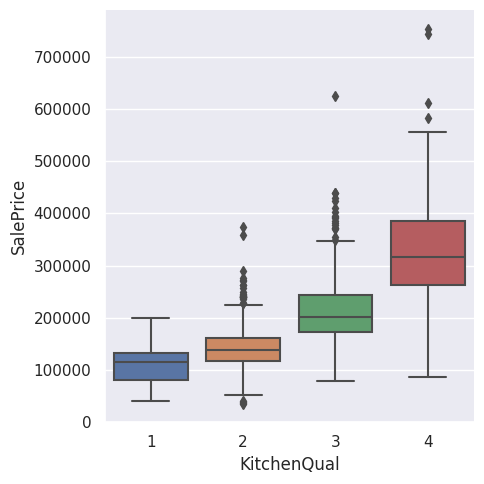

In [25]:
sns.catplot(x='KitchenQual', y="SalePrice", data=data, kind='box')

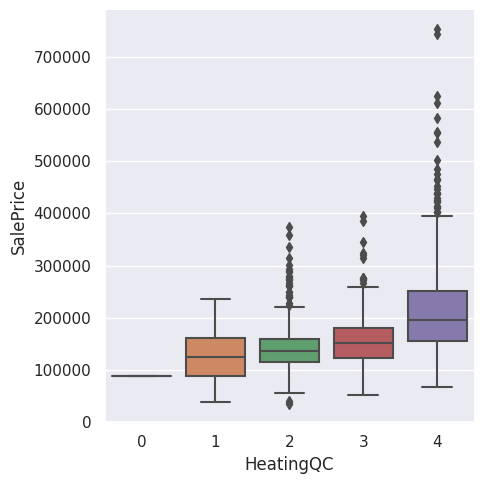

In [26]:
sns.catplot(x='HeatingQC', y="SalePrice", data=data, kind='box')

This column is obviously ordinal data, it needs to be replaced with int

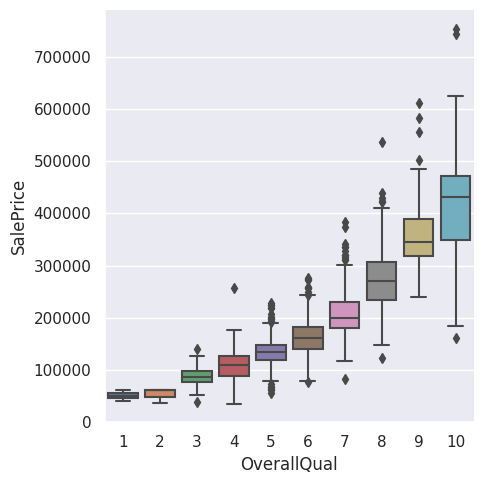

In [27]:
sns.catplot(x='OverallQual', y="SalePrice", data=data, kind='box')

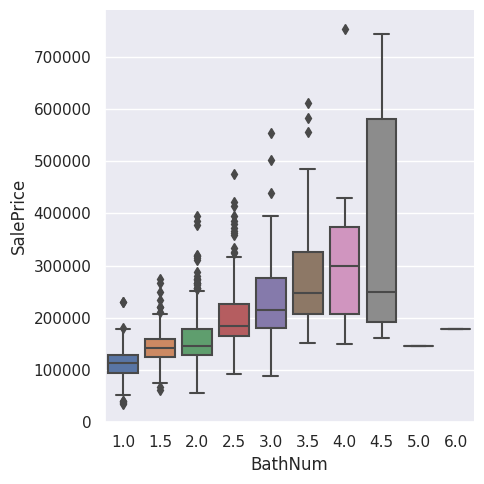

In [28]:
sns.catplot(x='BathNum', y="SalePrice", data=data, kind='box')

## Correlation Maps

<ipython-input-29-e7bdc7064e62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

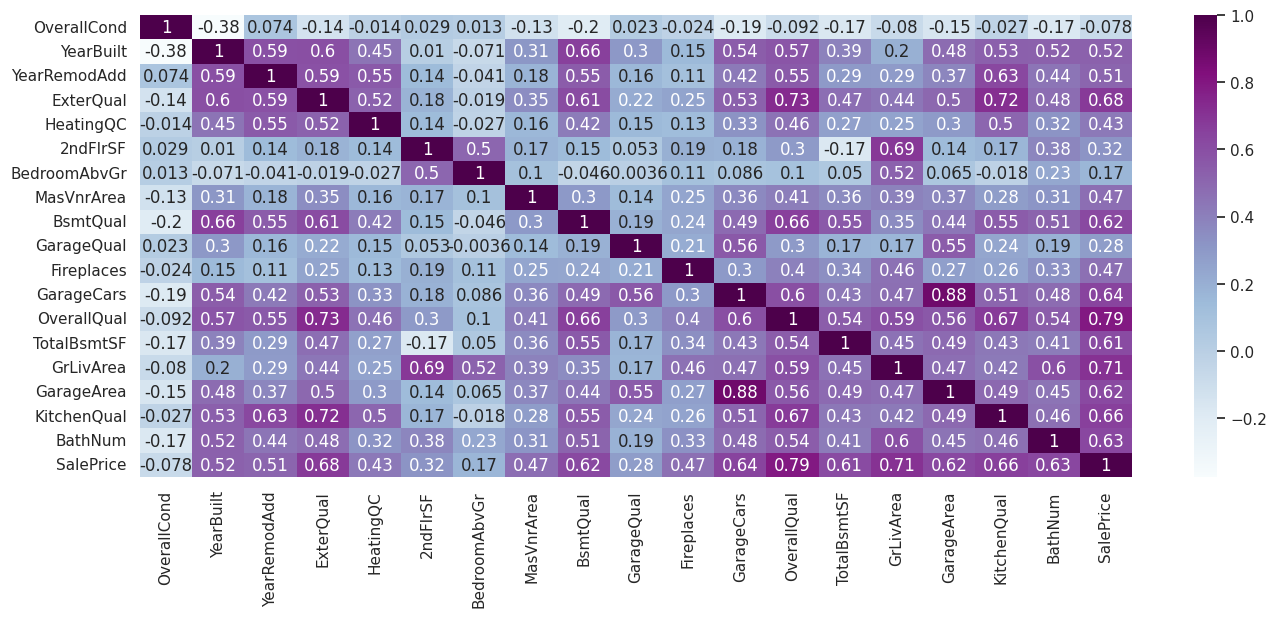

In [29]:
corr = data.corr()
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.0)
sns.heatmap(corr, annot=True, cmap="BuPu")

"ExterQual and 'OverallQuall' are corellative but I won't delete any

<ipython-input-30-687e6b913539>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


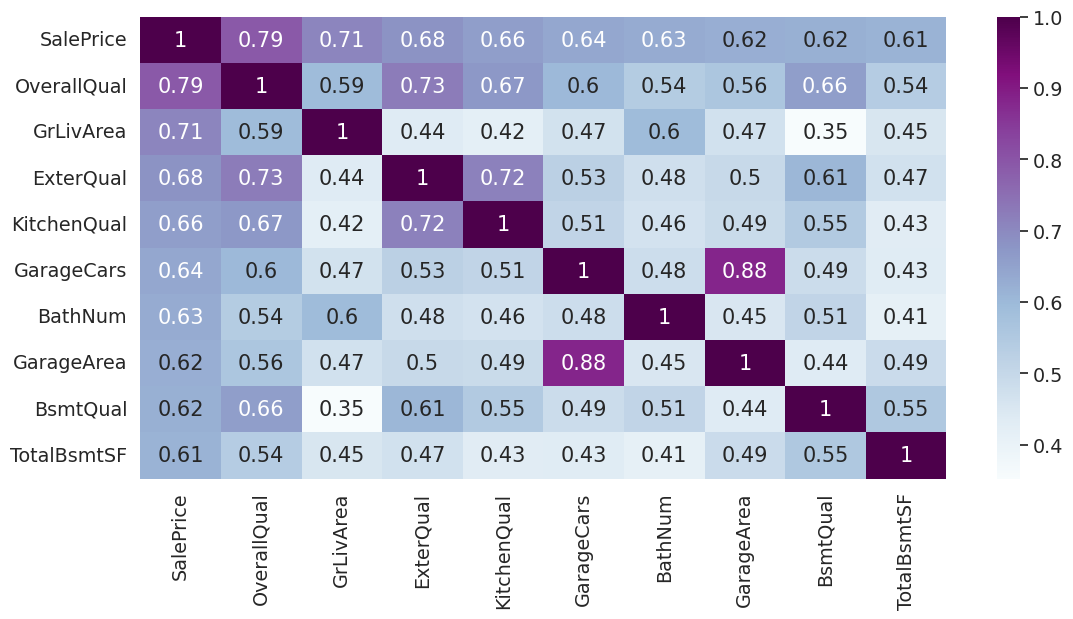

In [30]:
k = 10 #number of variables for heatmap
plt.figure(figsize=(13, 6))
corrmat = data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols.values, xticklabels=cols.values, cmap="BuPu")

As a result, 'GarageArea' and 'GarageCars' are stringly correlative, so delete one of them

In [31]:
data = data.drop(['GarageCars'], axis=1)
test_data = test_data.drop(['GarageCars'], axis=1)

## Features that needed to be changed to have normal distribiution

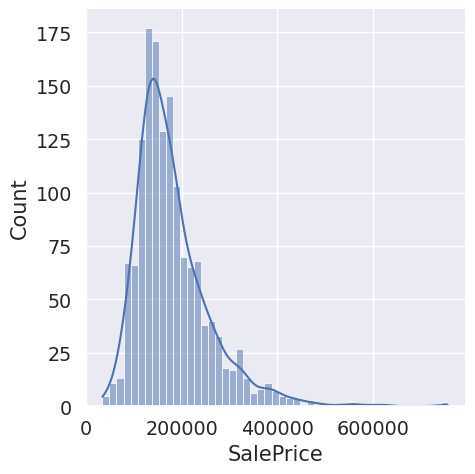

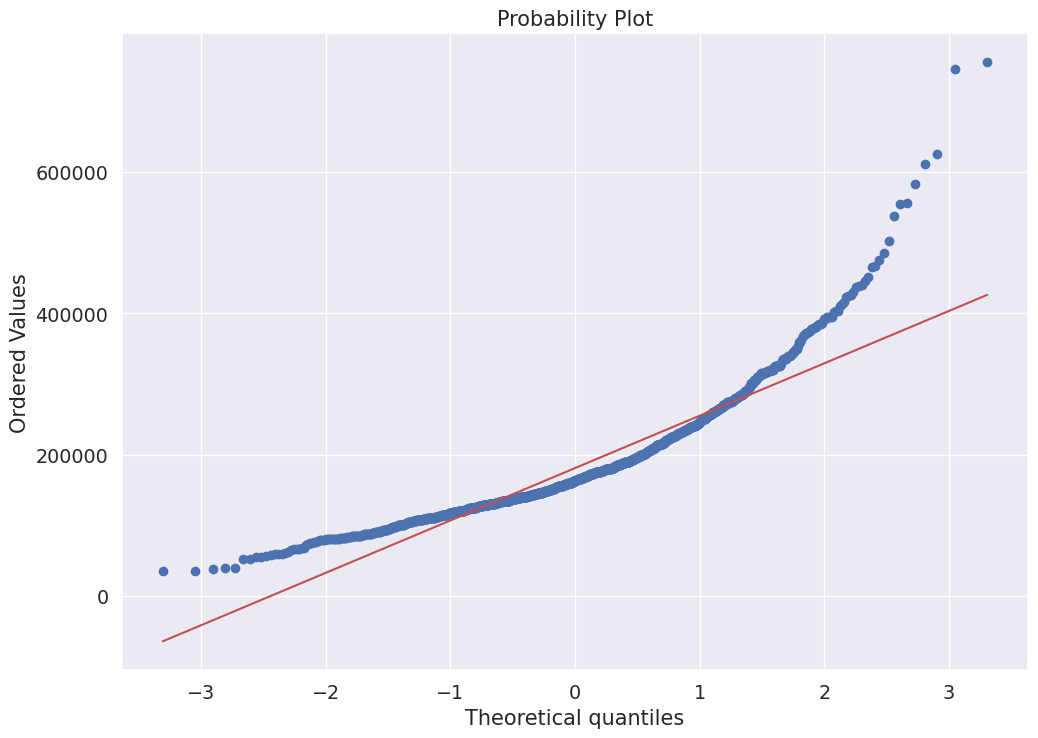

In [32]:
#histogram and normal probability plot
from scipy import stats
import matplotlib.pyplot as plt
sns.displot(df['SalePrice'], kde=True)
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

I change only df it so won't change data which I'm going to save

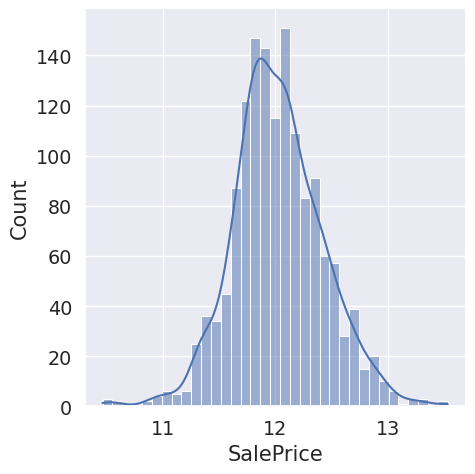

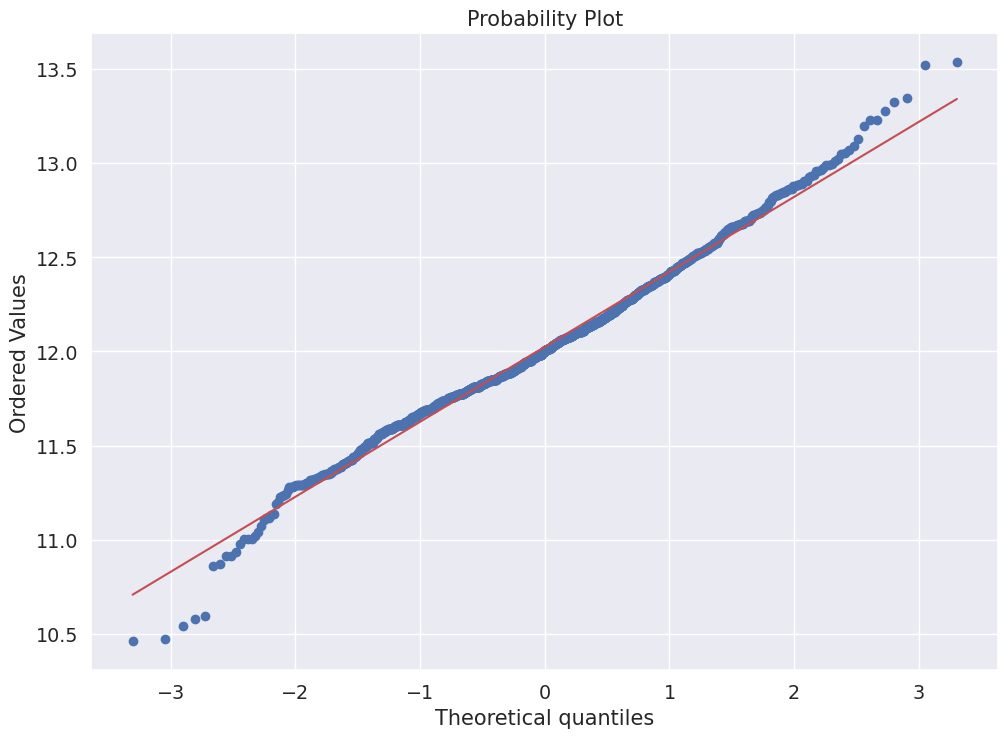

In [33]:
df["SalePrice"] = np.log(data['SalePrice'])
sns.displot(df['SalePrice'], kde=True)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

SalePrice is better with log transformation

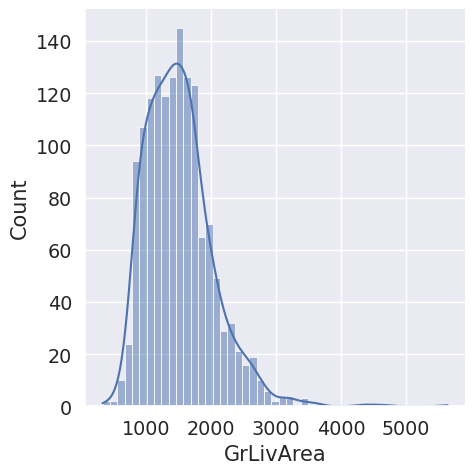

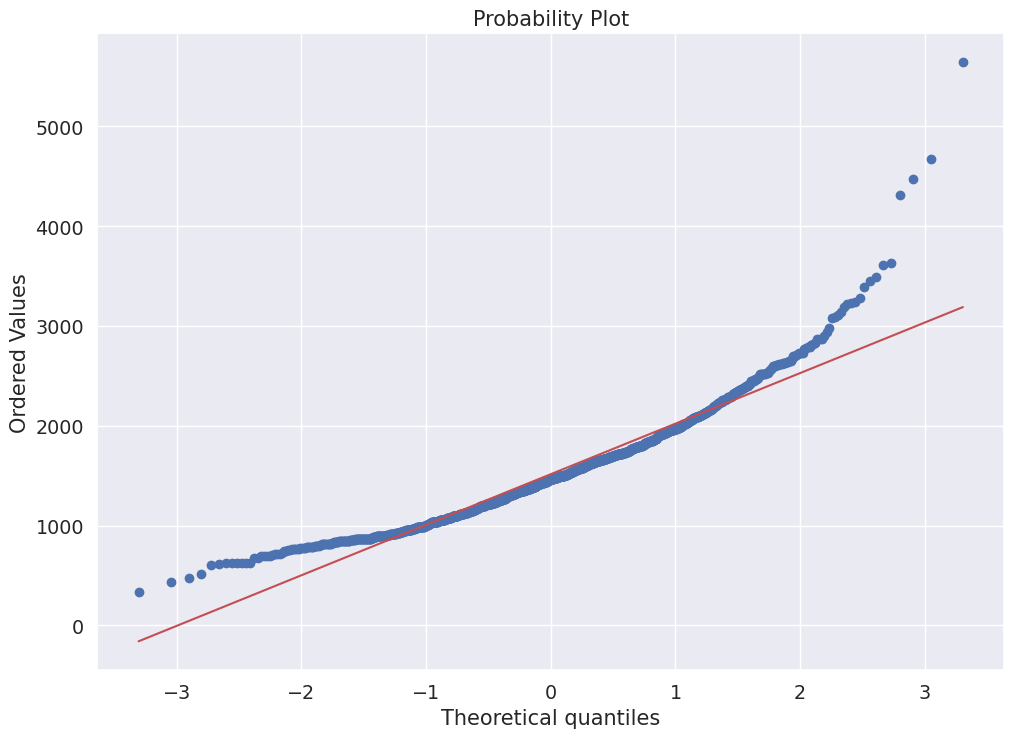

In [34]:
sns.displot(data['GrLivArea'], kde=True)
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

Make Box Cox or log transformation in Pipeline

In [35]:
# data['TotalBsmtSF'] = np.log1p(data['TotalBsmtSF'])
# data['GrLivArea'] = np.log1p(data['GrLivArea'])
# data['GarageArea'] = np.log1p(data['GarageArea'])
# data['MasVnrArea'] = np.log1p(data['MasVnrArea'])


# test_data['TotalBsmtSF'] = np.log1p(test_data['TotalBsmtSF'])
# test_data['GrLivArea'] = np.log1p(test_data['GrLivArea'])
# test_data['GarageArea'] = np.log1p(test_data['GarageArea'])
# test_data['MasVnrArea'] = np.log1p(test_data['MasVnrArea'])


# Outliars

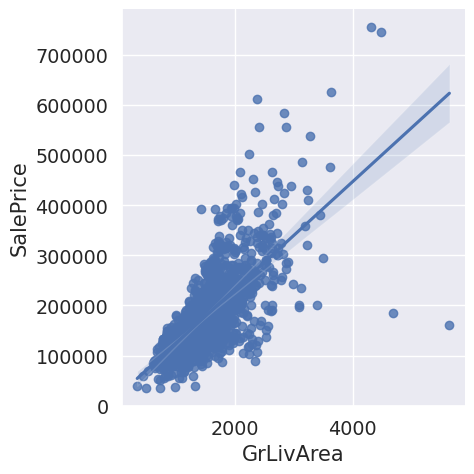

In [36]:
sns.lmplot(x='GrLivArea', y="SalePrice", data=data)

Two lowest values are far away and can be considered as outliars

In [37]:
data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 200000)]

,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,Heating,...,GarageQual,Fireplaces,SaleType,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,PosN,1Fam,2Story,5,2007,2008,Hip,CompShg,4,GasA,...,2,1,New,10,3138,4676,884,4,4.5,184750
1299,Feedr,1Fam,2Story,5,2008,2008,Hip,ClyTile,4,GasA,...,2,3,New,10,6110,5642,1418,4,4.5,160000


In [38]:
data = data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice'] < 200000)].index)

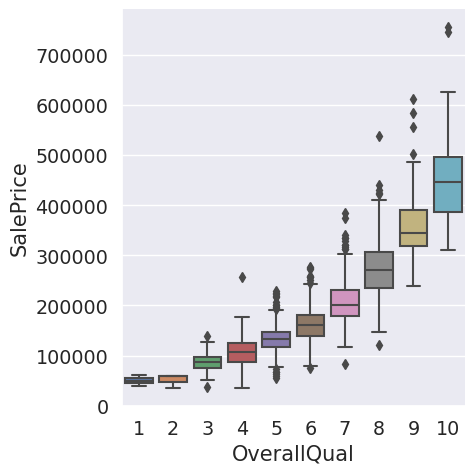

In [39]:
sns.catplot(x='OverallQual', y="SalePrice", data=data, kind='box')

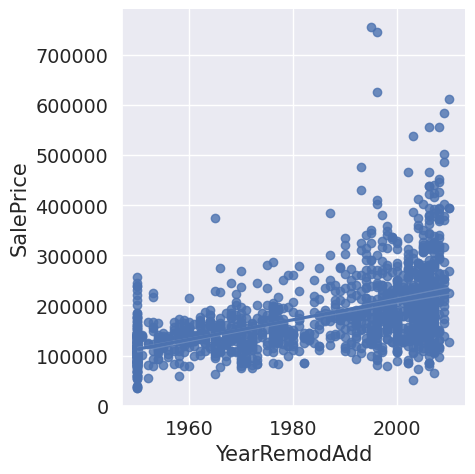

In [40]:
sns.lmplot(x='YearRemodAdd', y="SalePrice", data=data)

In [41]:
data[(df['YearRemodAdd'] > 1960) & (data['YearRemodAdd'] < 1970) & (data['SalePrice'] > 350000)]

<ipython-input-41-1aa653c2b4d5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(df['YearRemodAdd'] > 1960) & (data['YearRemodAdd'] < 1970) & (data['SalePrice'] > 350000)]


,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,Heating,...,GarageQual,Fireplaces,SaleType,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,KitchenQual,BathNum,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
314,Norm,1Fam,1Story,5,1965,1965,Hip,CompShg,2,GasW,...,2,2,WD,7,2136,2036,513,2,4.0,375000


In [42]:
data = data.drop(314, axis=0)

# Change rows that have some values and they're abcent in test dataset

In [43]:
data = data.drop(data[(data['RoofMatl'] == 'Metal') | (data['RoofMatl'] == 'Membran') | (data['RoofMatl'] == 'Roll')].index)

In [44]:
data['Fireplaces'] = np.where(data.Fireplaces == 3, 3, data.Fireplaces)
data['Fireplaces'] = np.where(data.Fireplaces == 4, 3, data.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 3, 3, test_data.Fireplaces)
test_data['Fireplaces'] = np.where(test_data.Fireplaces == 4, 3, test_data.Fireplaces)

In [45]:
data['Heating'] = np.where(data.Heating == 'Floor', 'GasA', data.Heating)
data['Heating'] = np.where(data.Heating == 'OthW', 'GasA', data.Heating)

data['HouseStyle'] = np.where(data.HouseStyle == '2.5Fin', 'Fin', data.HouseStyle)
data['HouseStyle'] = np.where(data.HouseStyle == '1.5Fin', 'Fin', data.HouseStyle)
test_data['HouseStyle'] = np.where(test_data.HouseStyle == '1.5Fin', 'Fin', test_data.HouseStyle)



# Save to New csv file

In [46]:
data.shape

(1454, 26)

In [47]:
y = df.SalePrice
df_no_y = df.drop("SalePrice", axis=1)

In [48]:
data.to_csv('/content/drive/MyDrive/Data/houses/chosen.csv', na_rep='N/A')

In [49]:
test_data.to_csv('/content/drive/MyDrive/Data/houses/chosen_test.csv', na_rep='N/A')

Box Cox transformation

In [50]:
# def box_cox_transformer(lam):
#     return FunctionTransformer(lambda x: ((x + 1)**lam - 1)/lam)

In [51]:
# num_chan = make_pipeline(
#     SimpleImputer(strategy="mean"), StandardScaler())
# cat_chan = make_pipeline(
#     SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown="ignore"))

# num_chan_tree = SimpleImputer(strategy="mean")
# cat_chan_tree = make_pipeline(
#     SimpleImputer(strategy="most_frequent", fill_value="missing"),
#     OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),)

# linear_changer = make_column_transformer(
#     (num_chan, selector(dtype_include="number")),
#     (cat_chan, selector(dtype_include="object")),)

# tree_changer = make_column_transformer(
#     (num_chan_tree, selector(dtype_include="number")),
#     (cat_chan_tree, selector(dtype_include="object")),)